# Data Cleaning, Type Conversion & Validation (Pandas)

This notebook cleans the **Heart Disease Health Indicators** dataset and makes it analysis‑ready.

**What this notebook does**
1. Loads the raw CSV
2. Standardizes column names
3. Converts columns to appropriate dtypes (binary/ordinal as `category`, numeric as numbers)
4. Runs data integrity checks (missing values, duplicates, invalid codes/ranges)
5. Filters out invalid rows using documented value ranges
6. Saves a cleaned dataset for EDA / modeling


## 1) Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## 2) Load the dataset

In [2]:
url = "https://drive.google.com/uc?id=16DeG8mBHOMjYZYsuoc1r_7ivwMZf6mOA&export=download"
# Read CSV into a DataFrame
df = pd.read_csv(url)
print("Initial shape (rows, cols):", df.shape)
df.head()

Initial shape (rows, cols): (253680, 22)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


## 3) Standardize column names

## 3) Standardize column names

In [3]:
# Good practice: remove leading/trailing spaces from column names
# to prevent subtle bugs (e.g., 'BMI ' vs 'BMI').
df.columns = df.columns.str.strip()

df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## 4) Define column groups (binary / ordinal / numeric)

These groupings follow the dataset codebook conventions:
- **Binary**: coded as 0/1
- **Ordinal**: coded as integer categories (e.g., Age group 1–13)
- **Numeric**: continuous or count-like measures (BMI, days of poor health)


In [4]:
# Binary (0/1) indicator variables
binary_cols = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
    "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
    "DiffWalk", "Sex"
]

# Ordinal-coded categorical variables
ordinal_cols = ["GenHlth", "Age", "Education", "Income"]

# Numeric variables
numeric_cols = ["BMI", "MentHlth", "PhysHlth", "HeartDiseaseorAttack"]

# Quick check: ensure all expected columns exist
missing_expected = [c for c in (binary_cols + ordinal_cols + numeric_cols) if c not in df.columns]
print("Missing expected columns:", missing_expected)

Missing expected columns: []


## 5) Convert data types (categorical + numeric)

In [5]:
# Convert binary + ordinal to pandas 'category' dtype
# This reduces memory usage and makes EDA/modeling clearer (treated as categories).
for col in binary_cols + ordinal_cols:
    df[col] = df[col].astype("category")

# Convert numeric columns to numeric (coerce invalid strings to NaN)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  253680 non-null  int64   
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  int64   
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   Diabetes              253680 non-null  int64   
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

## 6) Missing values & duplicates (integrity checks)

In [6]:
# Missing values per column
missing = df.isna().sum().sort_values(ascending=False)
display(missing.head(15))

# Duplicate rows count (before removal)
dup_count = df.duplicated().sum()
print("Duplicate rows (exact matches):", dup_count)

# Remove duplicates
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
dtype: int64

Duplicate rows (exact matches): 23899
Shape after dropping duplicates: (229781, 22)


## 7) Validate allowed code values (binary columns)

Binary columns must contain only **0 or 1**.
Anything else indicates invalid coding and will be removed.


In [7]:
# Show unique categories for each binary column (after converting to 'category')
for col in binary_cols:
    # categories might include NaN if coercion introduced missing values elsewhere
    print(f"{col}: {list(df[col].cat.categories)}")

HighBP: [0, 1]
HighChol: [0, 1]
CholCheck: [0, 1]
Smoker: [0, 1]
Stroke: [0, 1]
PhysActivity: [0, 1]
Fruits: [0, 1]
Veggies: [0, 1]
HvyAlcoholConsump: [0, 1]
AnyHealthcare: [0, 1]
NoDocbcCost: [0, 1]
DiffWalk: [0, 1]
Sex: [0, 1]


In [8]:
# Keep only rows where all binary columns are exactly 0 or 1
before = df.shape[0]

for col in binary_cols:
    df = df[df[col].isin([0, 1])]

after = df.shape[0]
print("Rows removed by binary validation:", before - after)
print("Shape now:", df.shape)

Rows removed by binary validation: 0
Shape now: (229781, 22)


## 8) Validate numeric/ordinal ranges (codebook + realistic constraints)

We drop rows with values outside these ranges:
- HeartDiseaseorAttack: 0-2
- BMI: 10–80 (removes extreme/outlier coding errors)
- MentHlth, PhysHlth: 0–30 days
- GenHlth: 1–5
- Age: 1–13
- Education: 1–6
- Income: 1–8


In [9]:
valid_ranges = {
    "HeartDiseaseorAttack": (0,2),
    "BMI": (10, 80),
    "MentHlth": (0, 30),
    "PhysHlth": (0, 30),
    "GenHlth": (1, 5),
    "Age": (1, 13),
    "Education": (1, 6),
    "Income": (1, 8)
}

# Before filtering, count invalid values per column (useful for reporting)
invalid_counts = {}
for col, (mn, mx) in valid_ranges.items():
    # Convert to numeric for range checks (categories are stored as numbers underneath)
    s = pd.to_numeric(df[col], errors="coerce")
    invalid_counts[col] = ((s < mn) | (s > mx) | (s.isna())).sum()

pd.Series(invalid_counts).sort_values(ascending=False)

BMI                     279
HeartDiseaseorAttack      0
MentHlth                  0
PhysHlth                  0
GenHlth                   0
Age                       0
Education                 0
Income                    0
dtype: int64

In [10]:
# Apply range filters (drop invalid-coded rows)
before = df.shape[0]

for col, (mn, mx) in valid_ranges.items():
    s = pd.to_numeric(df[col], errors="coerce")
    df = df[(s >= mn) & (s <= mx)]

after = df.shape[0]
print("Rows removed by range validation:", before - after)
print("Final shape:", df.shape)

Rows removed by range validation: 279
Final shape: (229502, 22)


## 9) Final dataset checks

In [11]:
# Confirm no missing values remain in key columns
final_missing = df.isna().sum().sort_values(ascending=False)
display(final_missing.head(15))

# Summary stats for numeric columns
df[numeric_cols].describe()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
dtype: int64

,BMI,MentHlth,PhysHlth,HeartDiseaseorAttack
count,229502.000000,229502.000000,229502.000000,229502.000000
mean,28.615716,3.505189,4.675358,0.103254
std,6.485057,7.713532,9.046249,0.304291
min,12.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000
75%,32.000000,2.000000,4.000000,0.000000
max,80.000000,30.000000,30.000000,1.000000


## 10) Save cleaned dataset

In [12]:
# Save cleaned data for downstream EDA/modeling
cleaned_path = "Heartdisease_analysis_cleaned_Harini_M.csv"
df.to_csv(cleaned_path, index=False)

print("✅ Cleaned dataset saved to:", cleaned_path)

✅ Cleaned dataset saved to: Heartdisease_analysis_cleaned_Harini_M.csv


## 11) Cleaning summary (optional)

This small summary is helpful to copy into your report.


In [13]:
summary = {
    "final_rows": int(df.shape[0]),
    "final_cols": int(df.shape[1]),
    "any_missing_left": bool(df.isna().any().any()),
}
summary

{'final_rows': 229502, 'final_cols': 22, 'any_missing_left': False}

## UNIVARIATE ANALYSIS
Univariate analysis involves analyzing one variable at a time to understand its distribution, spread, and frequency.

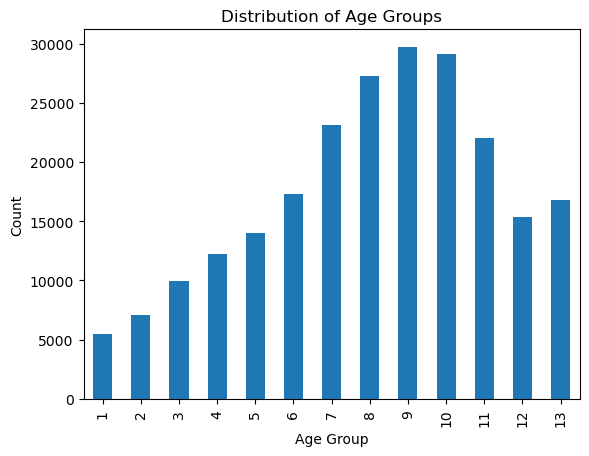

In [14]:

# Age Distribution
df['Age'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


### Interpretation – Age Distribution
The bar chart shows that a higher number of respondents belong to middle and older age groups. This indicates that heart disease risk increases with age, making age an important demographic factor in cardiovascular health analysis.

**Inference:** Older age groups are more vulnerable to heart disease, highlighting the need for age-specific preventive strategies.

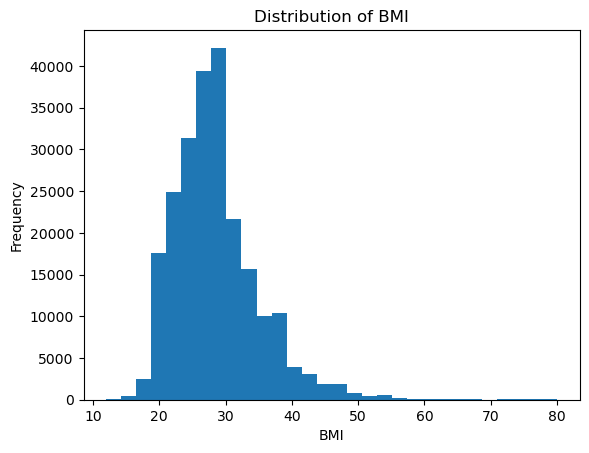

In [15]:

# BMI Distribution
plt.hist(df['BMI'], bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


### Interpretation – BMI Distribution
The BMI histogram is right-skewed, with many individuals falling into overweight and obese ranges. This reflects a high prevalence of unhealthy weight levels in the population.

**Inference:** Higher BMI is a significant risk factor for heart disease and should be closely monitored in predictive analysis.

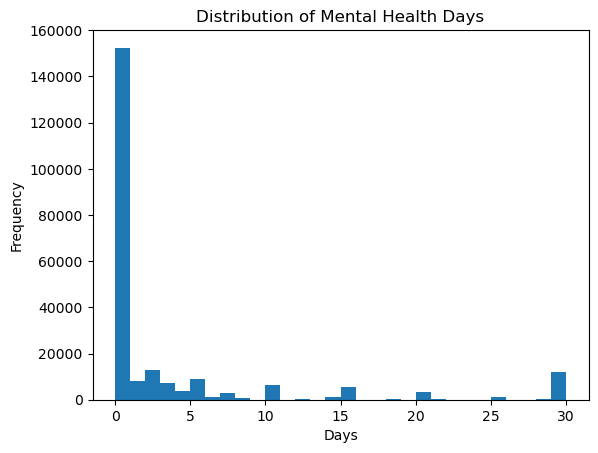

In [16]:

# Mental Health Days
plt.hist(df['MentHlth'], bins=30)
plt.title("Distribution of Mental Health Days")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()


### Interpretation – Mental Health Days
Most individuals report zero or very few poor mental health days, while a smaller group reports higher values, resulting in a skewed distribution.

**Inference:** Although most respondents have good mental health, poor mental health may still contribute indirectly to heart disease risk through stress-related factors.

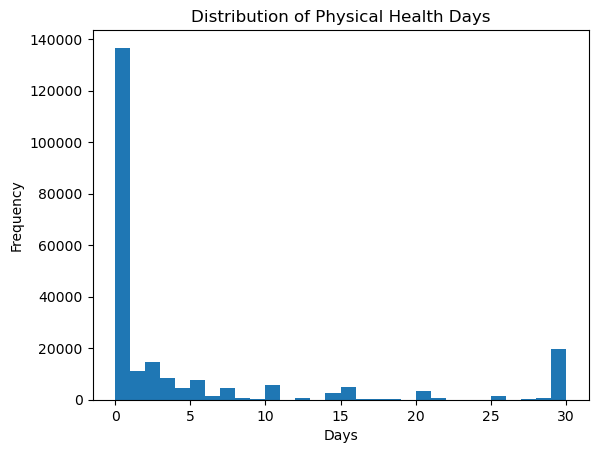

In [17]:

# Physical Health Days
plt.hist(df['PhysHlth'], bins=30)
plt.title("Distribution of Physical Health Days")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()


### Interpretation – Physical Health Days
The distribution shows that most respondents experience few poor physical health days, but some individuals report extended periods of poor physical health.

**Inference:** Persistent physical health problems may increase the likelihood of chronic conditions such as heart disease.

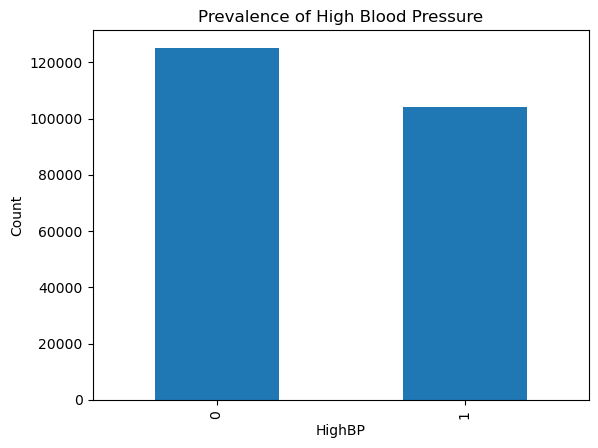

In [18]:

# High Blood Pressure
df['HighBP'].value_counts().plot(kind='bar')
plt.title("Prevalence of High Blood Pressure")
plt.xlabel("HighBP")
plt.ylabel("Count")
plt.show()


### Interpretation – High Blood Pressure
The bar chart indicates that a large proportion of respondents have high blood pressure.

**Inference:** High blood pressure is a major and well-established risk factor for heart disease and plays a crucial role in cardiovascular risk assessment.

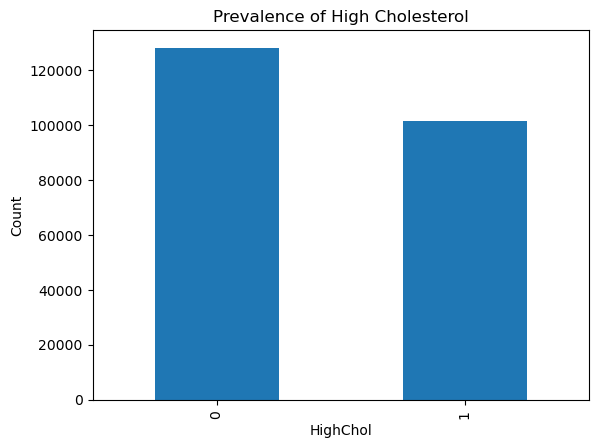

In [19]:

# High Cholesterol
df['HighChol'].value_counts().plot(kind='bar')
plt.title("Prevalence of High Cholesterol")
plt.xlabel("HighChol")
plt.ylabel("Count")
plt.show()


### Interpretation – High Cholesterol
The prevalence of high cholesterol is substantial among respondents, indicating widespread lipid imbalances.

**Inference:** High cholesterol significantly contributes to heart disease risk and should be included in all predictive models.

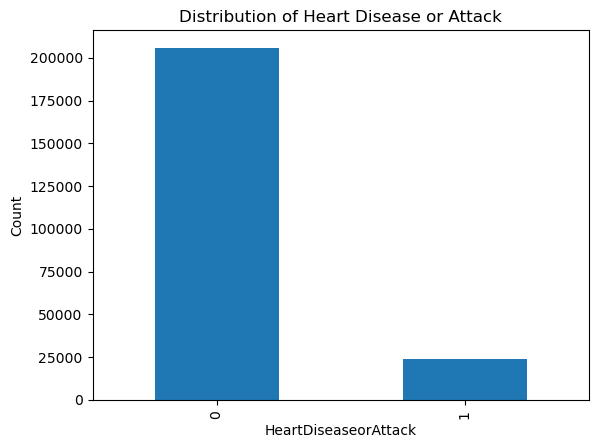

In [20]:

# Target Variable
df['HeartDiseaseorAttack'].value_counts().plot(kind='bar')
plt.title("Distribution of Heart Disease or Attack")
plt.xlabel("HeartDiseaseorAttack")
plt.ylabel("Count")
plt.show()


### Interpretation – Heart Disease or Attack
The distribution shows fewer individuals with heart disease compared to those without, indicating class imbalance in the dataset.

**Inference:** Class imbalance should be handled carefully during modeling to avoid biased predictions.

## BIVARIATE ANALYSIS

Bivariate analysis examines the relationship between two variables to understand how one variable influences another, especially in relation to heart disease.

/var/folders/t8/bb_mvw4x7r50pgd11r5d2zbm0000gn/T/ipykernel_6384/2082350334.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age')['HeartDiseaseorAttack'].mean().plot(kind='bar')


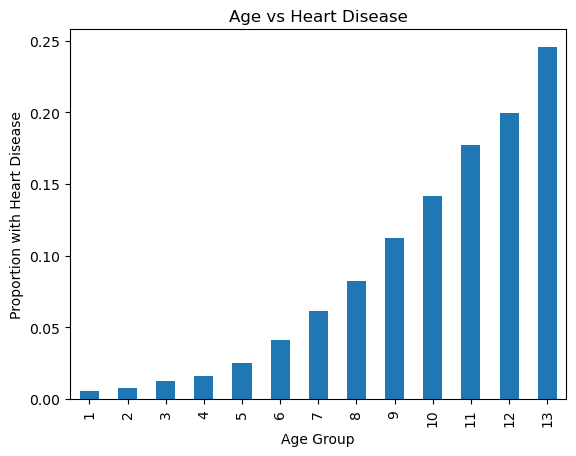

In [21]:

# Age vs Heart Disease
plt.figure()
df.groupby('Age', observed=False)['HeartDiseaseorAttack'].mean().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Heart Disease')
plt.title('Age vs Heart Disease')
plt.show()


### Interpretation – Age vs Heart Disease
The plot shows a clear increasing trend in heart disease prevalence with advancing age.

**Inference:** Age is strongly associated with heart disease, confirming it as a critical risk factor.

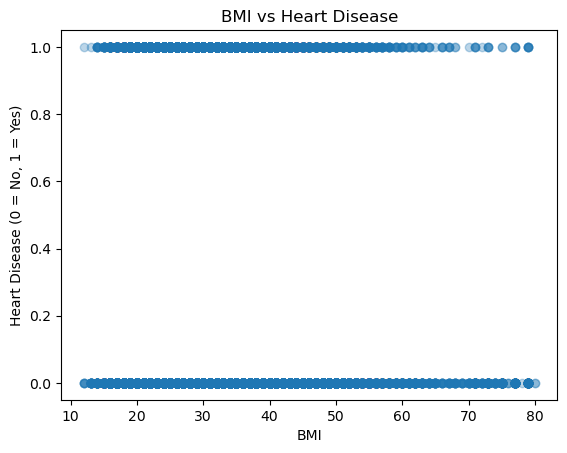

In [22]:

# BMI vs Heart Disease
plt.figure()
plt.scatter(df['BMI'], df['HeartDiseaseorAttack'], alpha=0.3)
plt.xlabel('BMI')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.title('BMI vs Heart Disease')
plt.show()


### Interpretation – BMI vs Heart Disease
Higher BMI values are associated with a greater occurrence of heart disease cases.

**Inference:** Obesity and overweight conditions contribute significantly to cardiovascular risk.

/var/folders/t8/bb_mvw4x7r50pgd11r5d2zbm0000gn/T/ipykernel_6384/2173423157.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('HighBP')['HeartDiseaseorAttack'].mean().plot(kind='bar')


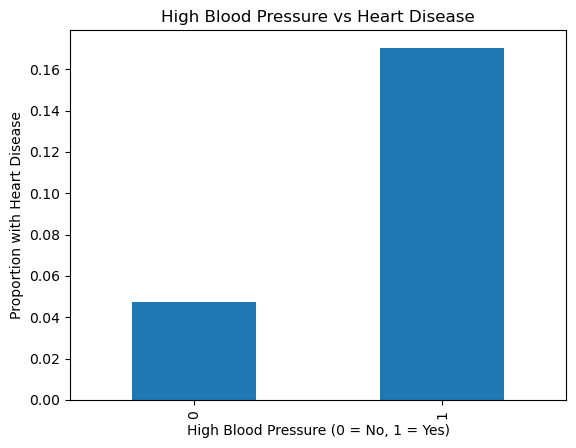

In [24]:

# High Blood Pressure vs Heart Disease
plt.figure()
df.groupby('HighBP', observed=False)['HeartDiseaseorAttack'].mean().plot(kind='bar')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Proportion with Heart Disease')
plt.title('High Blood Pressure vs Heart Disease')
plt.show()


### Interpretation – High Blood Pressure vs Heart Disease
Respondents with high blood pressure show a much higher prevalence of heart disease.

**Inference:** High blood pressure is one of the strongest predictors of heart disease.

/var/folders/t8/bb_mvw4x7r50pgd11r5d2zbm0000gn/T/ipykernel_6384/1765514347.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('HighChol')['HeartDiseaseorAttack'].mean().plot(kind='bar')


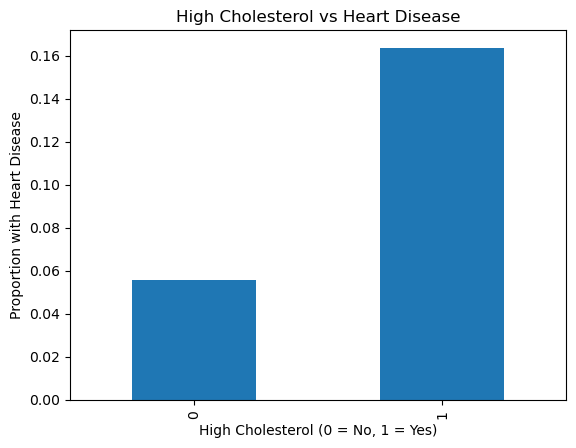

In [25]:

# High Cholesterol vs Heart Disease
plt.figure()
df.groupby('HighChol', observed=False)['HeartDiseaseorAttack'].mean().plot(kind='bar')
plt.xlabel('High Cholesterol (0 = No, 1 = Yes)')
plt.ylabel('Proportion with Heart Disease')
plt.title('High Cholesterol vs Heart Disease')
plt.show()


### Interpretation – High Cholesterol vs Heart Disease
Individuals with high cholesterol exhibit a higher proportion of heart disease cases.

**Inference:** Cholesterol levels play a significant role in heart disease development.


# Exploratory Data Analysis (EDA)
## Univariate and Bivariate Analysis

> This section **extends** the existing data cleaning notebook.
> All data preparation steps above are retained as-is.
> The analysis below assumes the cleaned dataframe is named **`df`**.



## Univariate Analysis
### 1. Distribution of Key Variables


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

def plot_hist(series, title, bins=30):
    plt.figure(figsize=(7,4))
    plt.hist(series.dropna(), bins=bins)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Count")
    plt.show()

plot_hist(df['BMI'], "Distribution of BMI", bins=40)
plot_hist(df['MentHlth'], "Distribution of Mental Health Days", bins=31)
plot_hist(df['PhysHlth'], "Distribution of Physical Health Days", bins=31)

age_counts = df['Age'].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.title("Distribution of Age Categories (1 = 18–24 … 13 = 80+)")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.show()



**Findings**
- BMI shows a right-skewed distribution, indicating a high prevalence of overweight and obesity.
- Mental and physical health days are concentrated at zero, with a long right tail.
- Age distribution spans all adult groups, enabling demographic comparisons.



### 2. Prevalence of Health Conditions


In [ ]:

def plot_binary_prevalence(col):
    counts = df[col].value_counts().sort_index()
    plt.figure(figsize=(6,3.5))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"Prevalence of {col}")
    plt.ylabel("Count")
    plt.show()
    print(f"{col} prevalence (1):", round((df[col] == 1).mean(), 3))

for col in ['HighBP','HighChol','Smoker','Stroke','DiffWalk','Diabetes']:
    plot_binary_prevalence(col)



### 3. Target Variable Distribution: HeartDiseaseorAttack


In [ ]:

target_counts = df['HeartDiseaseorAttack'].value_counts().sort_index()

plt.figure(figsize=(5,4))
plt.bar(['No (0)', 'Yes (1)'], target_counts.values)
plt.title("Heart Disease Distribution")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(5,5))
plt.pie(target_counts.values, labels=['No','Yes'], autopct='%1.1f%%')
plt.title("Heart Disease Proportion")
plt.show()



**Insight**
- The target variable is highly imbalanced, which is important for downstream modeling.



## Bivariate Analysis
### 1. Risk Factors vs Heart Disease


In [ ]:

binary_cols = [
    'HighBP','HighChol','Smoker','Stroke',
    'DiffWalk','Diabetes','PhysActivity'
]

grouped = df.groupby('HeartDiseaseorAttack')[binary_cols].mean().T
grouped.columns = ['No Heart Disease', 'Heart Disease']

grouped.plot(kind='bar', figsize=(10,5))
plt.title("Risk Factor Prevalence by Heart Disease Status")
plt.ylabel("Prevalence")
plt.xticks(rotation=45, ha='right')
plt.show()



**Findings**
- HighBP and HighChol are markedly more prevalent among heart disease cases.
- Stroke and diabetes show strong co-morbidity with heart disease.



### 2. Continuous Variables vs Heart Disease


In [ ]:

for col in ['BMI','MentHlth','PhysHlth']:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col, by='HeartDiseaseorAttack')
    plt.title(f"{col} by Heart Disease Status")
    plt.suptitle("")
    plt.show()



**Findings**
- Individuals with heart disease tend to have higher BMI and worse physical health.



### 3. Correlation Analysis


In [ ]:

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()



### 4. Heart Disease Across Demographics


In [ ]:

def prevalence_by(col):
    prev = df.groupby(col)['HeartDiseaseorAttack'].mean()
    prev.plot(kind='bar', figsize=(7,4))
    plt.ylabel("Heart Disease Prevalence")
    plt.title(f"Heart Disease by {col}")
    plt.show()

prevalence_by('Age')
prevalence_by('Sex')
prevalence_by('Education')



## Final EDA Summary
- Heart disease prevalence increases strongly with age.
- Males show higher prevalence than females.
- Classic cardiovascular risk factors (HighBP, HighChol, Diabetes) show strong associations.
- This analysis complements the data cleaning steps above and prepares the dataset for modeling.
